# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [602]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [603]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

### **1.1 Load the Data**

In [604]:
# Load the dataset
df = pd.read_csv('Employee_data.csv')


In [605]:
# Check the first few entries
df.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [606]:
# Inspect the shape of the dataset
print("Dataset shape:", df.shape)

Dataset shape: (74610, 24)


In [607]:
# Inspect the different columns in the dataset
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']


### **1.2 Check the basic statistics**

In [608]:
# Check the summary of the dataset
# Summary statistics
df.describe(include='all')


Employee ID           Age Gender  Years at Company    Job Role  \
count   74610.000000  74610.000000  74610      74610.000000       74610   
unique           NaN           NaN      2               NaN           5   
top              NaN           NaN   Male               NaN  Technology   
freq             NaN           NaN  40898               NaN       19350   
mean    37246.028696     38.529379    NaN         15.722638         NaN   
std     21505.785344     12.082299    NaN         11.224059         NaN   
min         1.000000     18.000000    NaN          1.000000         NaN   
25%     18624.250000     28.000000    NaN          7.000000         NaN   
50%     37239.500000     39.000000    NaN         13.000000         NaN   
75%     55871.750000     49.000000    NaN         23.000000         NaN   
max     74498.000000     59.000000    NaN         51.000000         NaN   

        Monthly Income Work-Life Balance Job Satisfaction Performance Rating  \
count     74610.000000             74610            74610              74610   
unique             NaN                 4                4                  4   
top                NaN              Good             High            Average   
freq               NaN             28196            37306              44786   
mean       7344.931417               NaN              NaN                NaN   
std        2596.373589               NaN              NaN                NaN   
min        1226.000000               NaN              NaN                NaN   
25%        5652.000000               NaN              NaN                NaN   
50%        7348.500000               NaN              NaN                NaN   
75%        8876.000000               NaN              NaN                NaN   
max       50030.000000               NaN              NaN                NaN   

        Number of Promotions  ... Number of Dependents  Job Level  \
count           74610.000000  ...         74610.000000      74610   
unique                   NaN  ...                  NaN          3   
top                      NaN  ...                  NaN      Entry   
freq                     NaN  ...                  NaN      29820   
mean                0.832958  ...             1.657432        NaN   
std                 0.995326  ...             1.579862        NaN   
min                 0.000000  ...             0.000000        NaN   
25%                 0.000000  ...             0.000000        NaN   
50%                 1.000000  ...             1.000000        NaN   
75%                 2.000000  ...             3.000000        NaN   
max                 4.000000  ...            15.000000        NaN   

       Company Size Company Tenure (In Months)  Remote Work  \
count         74610               72197.000000        74610   
unique            3                        NaN            2   
top          Medium                        NaN           No   
freq          37281                        NaN        60390   
mean            NaN                  55.711899          NaN   
std             NaN                  25.392325          NaN   
min             NaN                   2.000000          NaN   
25%             NaN                  36.000000          NaN   
50%             NaN                  56.000000          NaN   
75%             NaN                  76.000000          NaN   
max             NaN                 128.000000          NaN   

       Leadership Opportunities Innovation Opportunities  Company Reputation  \
count                     74610                    74610               74610   
unique                        2                        2                   4   
top                          No                       No                Good   
freq                      70952                    62486               37241   
mean                        NaN                      NaN                 NaN   
std                         NaN                      NaN                 NaN   
m

### **1.3 Check the data type of columns**

In [609]:
# Check the info to see the types of the feature variables and the null values present
# Data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [610]:
# Check the number of missing values in each column
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64


2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [611]:
# Check the percentage of missing values in each column
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_values_percentage)

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64


2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [612]:
# Handle the missing value rows in the column
df = df.dropna() 
df_cleaned = df.dropna(subset=['Distance from Home'])
df_cleaned_1 = df_cleaned.dropna(subset=['Company Tenure (In Months)'])
df_cleaned_1.head()
missing_values = df_cleaned_1.isnull().sum()
missing_values

Employee ID                   0
Age                           0
Gender                        0
Years at Company              0
Job Role                      0
Monthly Income                0
Work-Life Balance             0
Job Satisfaction              0
Performance Rating            0
Number of Promotions          0
Overtime                      0
Distance from Home            0
Education Level               0
Marital Status                0
Number of Dependents          0
Job Level                     0
Company Size                  0
Company Tenure (In Months)    0
Remote Work                   0
Leadership Opportunities      0
Innovation Opportunities      0
Company Reputation            0
Employee Recognition          0
Attrition                     0
dtype: int64

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [613]:
# Check the percentage of remaining data after missing values are removed
missing_values_percentage = (df_cleaned_1.isnull().sum() / len(df)) * 100
print(missing_values_percentage)

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            0.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    0.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [614]:
# Write a function to display the categorical columns with their unique values and check for redundant values
for col in df_cleaned_1.select_dtypes(include='object').columns:
    print(f"\n{col} unique values before cleanup:", df[col].unique())
    df[col] = df[col].str.strip().str.lower()
    print(f"{col} unique values after cleanup:", df[col].unique())



Gender unique values before cleanup: ['Male' 'Female']
Gender unique values after cleanup: ['male' 'female']

Job Role unique values before cleanup: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Job Role unique values after cleanup: ['education' 'media' 'healthcare' 'technology' 'finance']

Work-Life Balance unique values before cleanup: ['Excellent' 'Poor' 'Good' 'Fair']
Work-Life Balance unique values after cleanup: ['excellent' 'poor' 'good' 'fair']

Job Satisfaction unique values before cleanup: ['Medium' 'High' 'Very High' 'Low']
Job Satisfaction unique values after cleanup: ['medium' 'high' 'very high' 'low']

Performance Rating unique values before cleanup: ['Average' 'Low' 'High' 'Below Average']
Performance Rating unique values after cleanup: ['average' 'low' 'high' 'below average']

Overtime unique values before cleanup: ['No' 'Yes']
Overtime unique values after cleanup: ['no' 'yes']

Education Level unique values before cleanup: ['Associate Degree' 'Masterâ€™s D

In [615]:
# Check the data
df_cleaned_1.head()
df_cleaned_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70635 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 70635 non-null  int64  
 1   Age                         70635 non-null  int64  
 2   Gender                      70635 non-null  object 
 3   Years at Company            70635 non-null  int64  
 4   Job Role                    70635 non-null  object 
 5   Monthly Income              70635 non-null  int64  
 6   Work-Life Balance           70635 non-null  object 
 7   Job Satisfaction            70635 non-null  object 
 8   Performance Rating          70635 non-null  object 
 9   Number of Promotions        70635 non-null  int64  
 10  Overtime                    70635 non-null  object 
 11  Distance from Home          70635 non-null  float64
 12  Education Level             70635 non-null  object 
 13  Marital Status              70635 no

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [616]:
# Drop redundant columns which are not required for modelling
df_new = df_cleaned_1.drop(columns=['Employee ID', 'Employee Recognition', 'Company Reputation', 
                      'Leadership Opportunities', 'Innovation Opportunities'])

In [617]:
# Check first few rows of data
df_new.head()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70635 entries, 0 to 74609
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         70635 non-null  int64  
 1   Gender                      70635 non-null  object 
 2   Years at Company            70635 non-null  int64  
 3   Job Role                    70635 non-null  object 
 4   Monthly Income              70635 non-null  int64  
 5   Work-Life Balance           70635 non-null  object 
 6   Job Satisfaction            70635 non-null  object 
 7   Performance Rating          70635 non-null  object 
 8   Number of Promotions        70635 non-null  int64  
 9   Overtime                    70635 non-null  object 
 10  Distance from Home          70635 non-null  float64
 11  Education Level             70635 non-null  object 
 12  Marital Status              70635 non-null  object 
 13  Number of Dependents        70635 no

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [618]:
# Import Train Test Split
# imported all of them in the beginning
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [619]:
# Put all the feature variables in X
X = df_new.drop('Attrition', axis=1)

# Put the target variable in y
y = df_new['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [620]:
# Split the data into 70% train data and 30% validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)

Train shape: (49444, 18)
Validation shape: (21191, 18)


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [621]:
# Select numerical columns
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

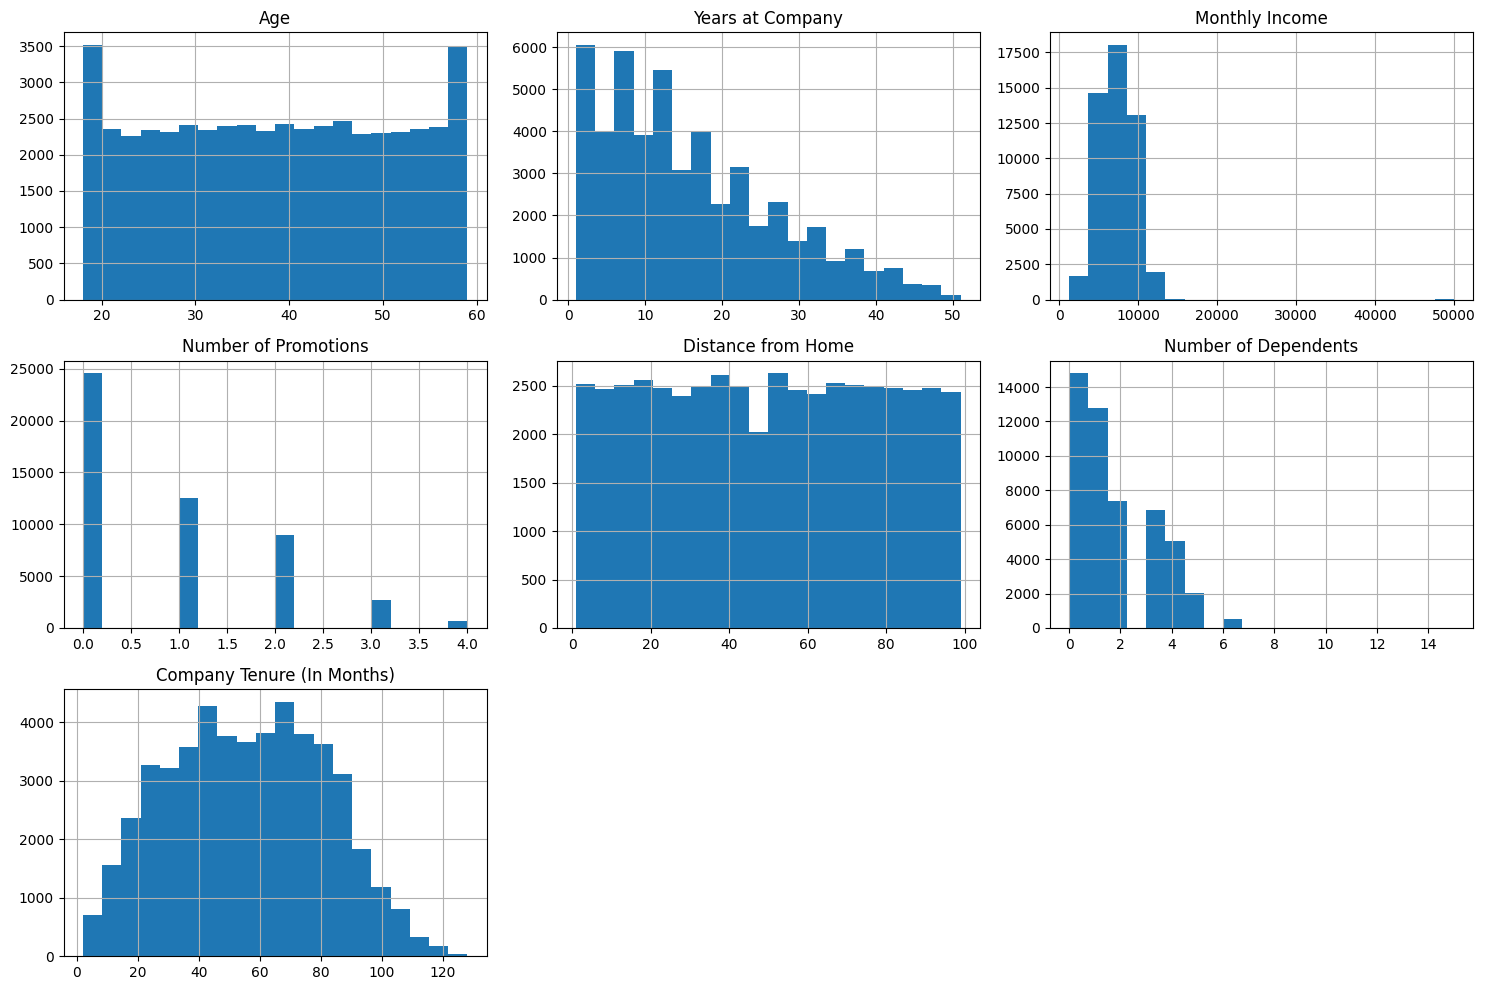

In [622]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
X_train_num.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

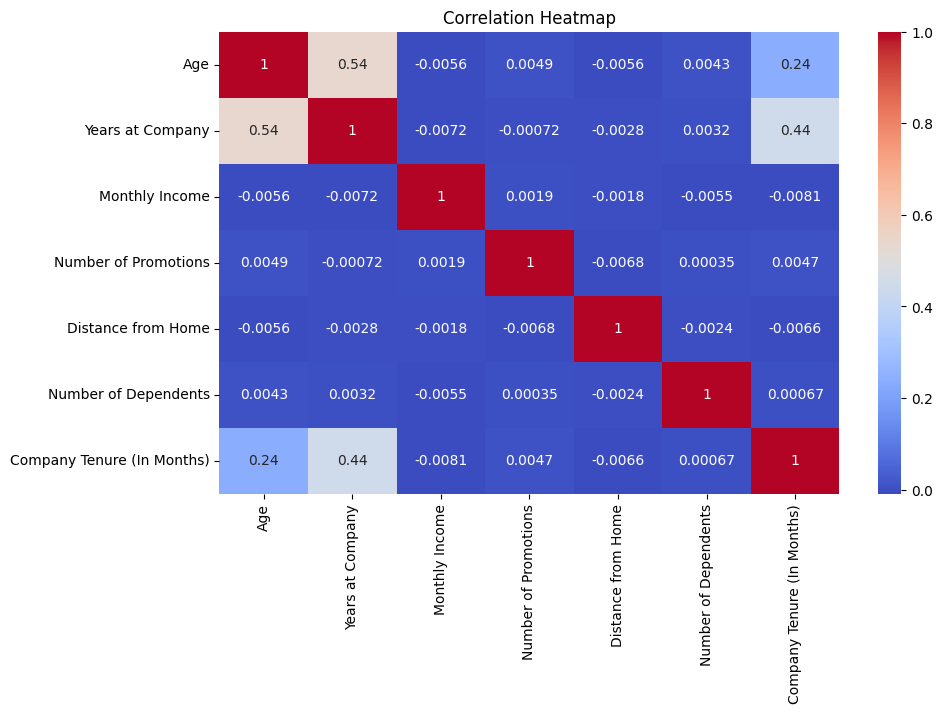

In [623]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(X_train_num.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

Class distribution in y_train:
Attrition
Stayed    0.521499
Left      0.478501
Name: proportion, dtype: float64


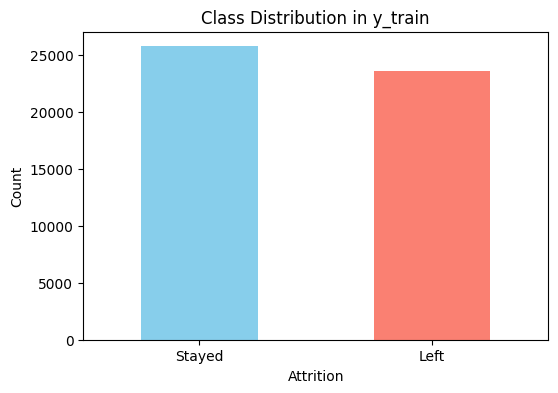

In [624]:
# Plot a bar chart to check class balance
print("Class distribution in y_train:")
print(y_train.value_counts(normalize=True))
plt.figure(figsize=(6, 4))
y_train.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution in y_train')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'], rotation=0)
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

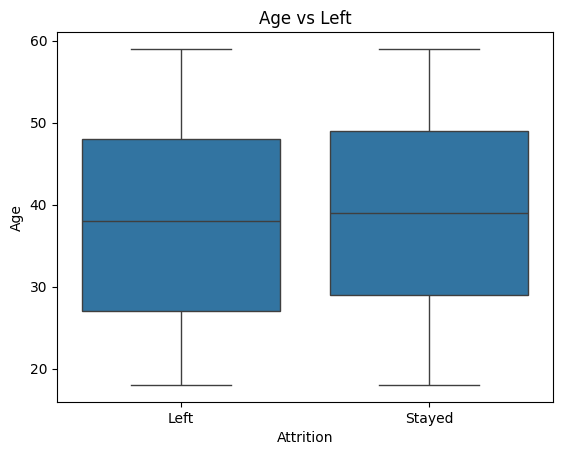

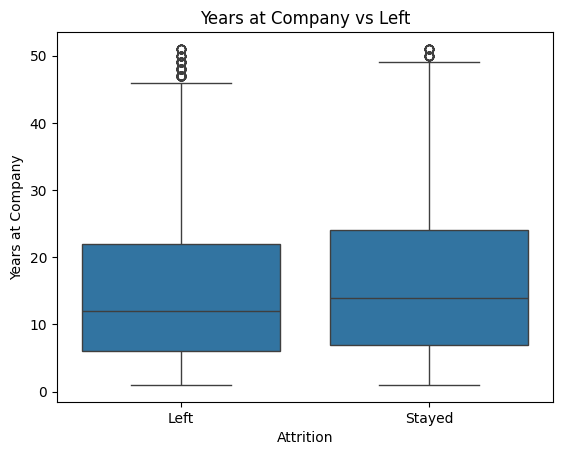

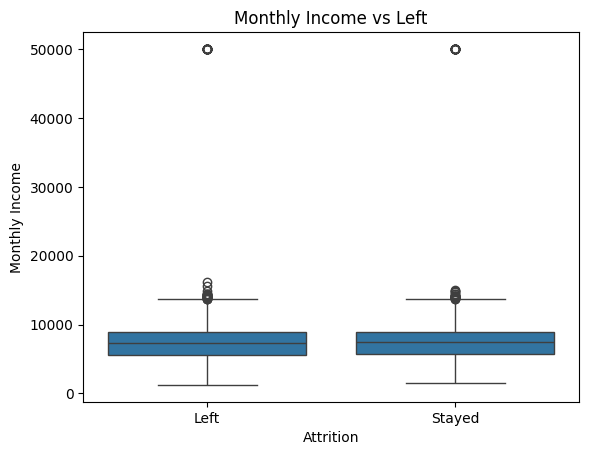

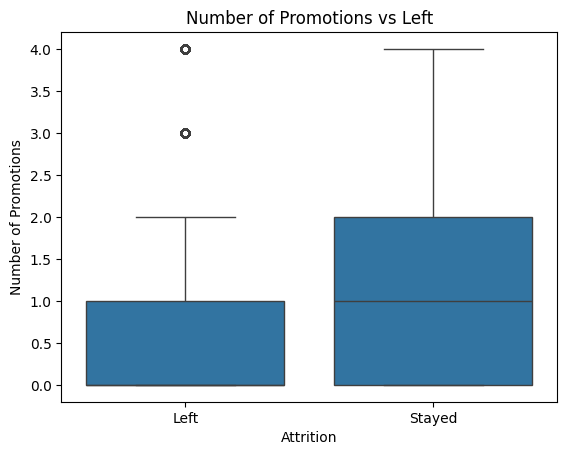

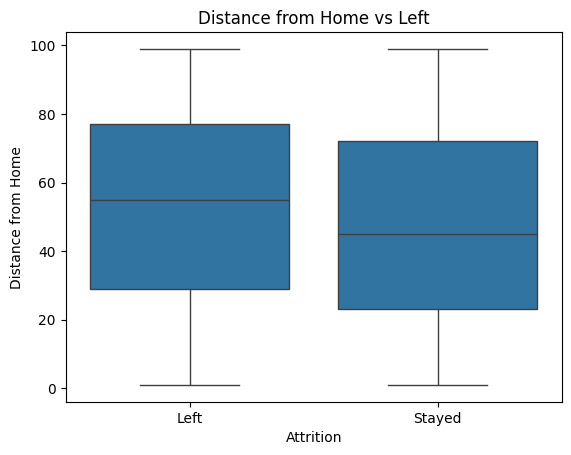

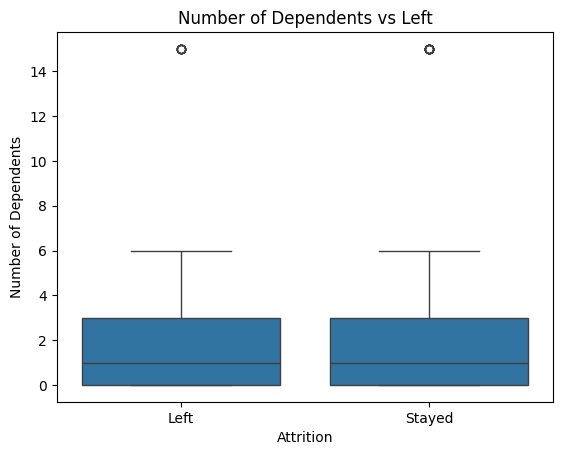

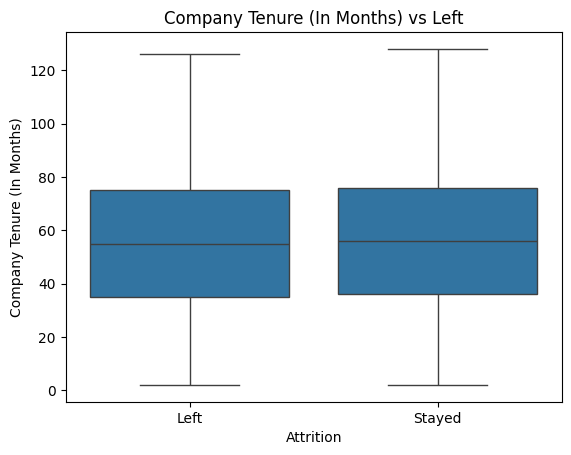

In [625]:
# Plot distribution for each categorical column with target variable
for col in X_train.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure()
    sns.boxplot(x=y_train, y=X_train[col])
    plt.title(f"{col} vs Left")
    plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [626]:
# Select numerical columns


5.1.2 Plot distribution of numerical columns

In [627]:
# Plot all the numerical columns to understand their distribution


### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

In [628]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix


### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [629]:
# Plot a bar chart to check class balance


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

In [630]:
# Plot distribution for each categorical column with target variable


## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [631]:
# Check the categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work'],
      dtype='object')


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [632]:
# Create dummy variables using the 'get_dummies' for independent columns
X_train_dummies = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

# Show the first few rows of the updated X_train
print(X_train_dummies.head())
# Add the results to the master DataFrame
X_train = X_train_dummies

# Show the first few rows of the updated X_train
print(X_train.head())

       Age  Years at Company  Monthly Income  Number of Promotions  \
41465   46                26            4617                     2   
69350   43                26            4447                     3   
28247   27                 8            9762                     0   
3217    47                29            5244                     2   
73636   25                10            4455                     0   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
41465                59.0                     2                        92.0   
69350                64.0                     0                       103.0   
28247                84.0                     1                        16.0   
3217                 59.0                     1                        74.0   
73636                36.0                     0                        62.0   

       Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
41465        False             False  

Now, drop the original categorical columns and check the DataFrame

In [633]:
# Drop the original categorical columns and check the DataFrame
# already added to x_train_dummies to x_train, so lost categorical varaibles

# Check the updated X_train DataFrame
print(X_train.head())

       Age  Years at Company  Monthly Income  Number of Promotions  \
41465   46                26            4617                     2   
69350   43                26            4447                     3   
28247   27                 8            9762                     0   
3217    47                29            5244                     2   
73636   25                10            4455                     0   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
41465                59.0                     2                        92.0   
69350                64.0                     0                       103.0   
28247                84.0                     1                        16.0   
3217                 59.0                     1                        74.0   
73636                36.0                     0                        62.0   

       Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
41465        False             False  

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [634]:

# Create dummy variables
# X_train_dummies = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_val_dummies = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)

# Align both sets to ensure same columns
X_train_dummies, X_val_dummies = X_train_dummies.align(X_val_dummies, join='left', axis=1, fill_value=0)

Now, drop the original categorical columns and check the DataFrame

In [635]:
# Drop categorical columns and check the DataFrame
# Drop the original categorical columns from X_train
# X_train = X_train.drop(columns=categorical_cols)

# Drop the original categorical columns from X_val
X_val = X_val.drop(columns=categorical_cols)

# Check the updated DataFrames
print(X_train.head())
print(X_val.head())

       Age  Years at Company  Monthly Income  Number of Promotions  \
41465   46                26            4617                     2   
69350   43                26            4447                     3   
28247   27                 8            9762                     0   
3217    47                29            5244                     2   
73636   25                10            4455                     0   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
41465                59.0                     2                        92.0   
69350                64.0                     0                       103.0   
28247                84.0                     1                        16.0   
3217                 59.0                     1                        74.0   
73636                36.0                     0                        62.0   

       Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
41465        False             False  

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [636]:
# Convert y_train and y_validation to DataFrame to create dummy variables
# Convert y_train and y_val to DataFrame for creating dummy variables
y_train_df = pd.DataFrame(y_train)
y_val_df = pd.DataFrame(y_val)

# Check the first few rows
print(y_train_df.head())
print(y_val_df.head())

      Attrition
41465      Left
69350      Left
28247      Left
3217       Left
73636      Left
      Attrition
23813    Stayed
14537      Left
45192      Left
13765      Left
3411     Stayed


6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [637]:
# Create dummy variables using the 'get_dummies' for dependent column
# Create dummy variables for y_train
y_train_dummies = pd.get_dummies(y_train_df, drop_first=True)



# Check the first few rows
print(y_train_dummies.head())


       Attrition_Stayed
41465             False
69350             False
28247             False
3217              False
73636             False


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [638]:
# Create dummy variables using the 'get_dummies' for dependent column
# Create dummy variables for y_val
y_val_dummies = pd.get_dummies(y_val_df, drop_first=True)
print(y_val_dummies.head())

       Attrition_Stayed
23813              True
14537             False
45192             False
13765             False
3411               True


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [639]:
# Drop redundant columns from both train and validation
# this step may be unnecessary as we used drop_first=True earlier

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [640]:
# Import the necessary scaling tool from scikit-learn
# already imported in the start
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [641]:
# Scale the numeric features present in the training set
scaler = StandardScaler()

# Scale the numeric features in X_train
X_train_scaled = scaler.fit_transform(X_train)

# Convert the scaled features back to a DataFrame for easier manipulation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Check the scaled data
print(X_train_scaled.head())

# Scale the numerical features present in the validation set
X_val_scaled = scaler.transform(X_val_dummies)

# Convert the scaled validation set back to a DataFrame
# need to perform additional step as below

        Age  Years at Company  Monthly Income  Number of Promotions  \
0  0.619633          0.919879       -1.064176              1.169006   
1  0.371227          0.919879       -1.130434              2.172605   
2 -0.953603         -0.685603        0.941122             -0.838194   
3  0.702434          1.187460       -0.819798              1.169006   
4 -1.119207         -0.507216       -1.127316             -0.838194   

   Distance from Home  Number of Dependents  Company Tenure (In Months)  \
0            0.319585              0.218921                    1.427790   
1            0.494961             -1.050275                    1.860823   
2            1.196466             -0.415677                   -1.564070   
3            0.319585             -0.415677                    0.719192   
4           -0.487146             -1.050275                    0.246793   

   Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
0    -1.105623         -0.407627            -0.546438  ...  

In [642]:
# Create dummy variables for both X_train and X_val with the same columns
# X_train_dummies = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
# X_val_dummies = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)

# Align the columns of X_val_dummies with X_train_dummies by reindexing
X_val_dummies = X_val_dummies.reindex(columns=X_train_dummies.columns, fill_value=0)

# Check the updated DataFrames
print(X_train_dummies.head())
print(X_val_dummies.head())

       Age  Years at Company  Monthly Income  Number of Promotions  \
41465   46                26            4617                     2   
69350   43                26            4447                     3   
28247   27                 8            9762                     0   
3217    47                29            5244                     2   
73636   25                10            4455                     0   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
41465                59.0                     2                        92.0   
69350                64.0                     0                       103.0   
28247                84.0                     1                        16.0   
3217                 59.0                     1                        74.0   
73636                36.0                     0                        62.0   

       Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
41465        False             False  

#### Initialize the StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_dummies)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_dummies.columns)

X_val_scaled = scaler.transform(X_val_dummies)

X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val_dummies.columns)

# Check the scaled data
print(X_train_scaled.head())
print(X_val_scaled.head())

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [643]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# Initialize the Logistic Regression model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)


7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [644]:
# Import RFE and select 15 variables
rfe = RFE(estimator=logreg, n_features_to_select=15)
# Assuming 'Stayed' is the column representing the target variable
# Check the column names in y_train_dummies
print(y_train_dummies.columns)
y_train_target = y_train_dummies['Attrition_Stayed']

# Apply RFE with the Logistic Regression model
rfe.fit(X_train_scaled, y_train_target)


Index(['Attrition_Stayed'], dtype='object')


RFE(estimator=LogisticRegression(class_weight='balanced', max_iter=1000),
    n_features_to_select=15)

In [645]:
# Display the features selected by RFE
selected_features = X_train_scaled.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['Years at Company', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Gender_Male', 'Work-Life Balance_Fair',
       'Work-Life Balance_Poor', 'Job Satisfaction_Low',
       'Job Satisfaction_Very High', 'Overtime_Yes', 'Education Level_PhD',
       'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior',
       'Remote Work_Yes'],
      dtype='object')


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [646]:
# Put columns selected by RFE into variable 'col'
col = selected_features

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [647]:
# Select only the columns selected by RFE
import statsmodels.api as sm
X_train_selected = X_train_scaled[col]

In [648]:
# View the training data
print(X_train_selected.head())

   Years at Company  Number of Promotions  Distance from Home  \
0          0.919879              1.169006            0.319585   
1          0.919879              2.172605            0.494961   
2         -0.685603             -0.838194            1.196466   
3          1.187460              1.169006            0.319585   
4         -0.507216             -0.838194           -0.487146   

   Number of Dependents  Gender_Male  Work-Life Balance_Fair  \
0              0.218921    -1.105623                1.512376   
1             -1.050275     0.904468               -0.661211   
2             -0.415677     0.904468               -0.661211   
3             -0.415677    -1.105623                1.512376   
4             -1.050275    -1.105623               -0.661211   

   Work-Life Balance_Poor  Job Satisfaction_Low  Job Satisfaction_Very High  \
0               -0.401636             -0.331781                   -0.503133   
1               -0.401636             -0.331781                   

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [649]:
# Import statsmodels and add constant to training set
X_train_selected_const = sm.add_constant(X_train_selected)

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [650]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
# Align the indices of X_train_selected_const and y_train_target
X_train_selected_const, y_train_target = X_train_selected_const.align(y_train_target, join='inner', axis=0)

# Fit a logistic regression model on the aligned data
logreg_model = sm.Logit(y_train_target, X_train_selected_const).fit()
print(logreg_model.summary())


Optimization terminated successfully.
         Current function value: 0.692078
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:       Attrition_Stayed   No. Observations:                32752
Model:                          Logit   Df Residuals:                    32736
Method:                           MLE   Df Model:                           15
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:               0.0001592
Time:                        22:20:33   Log-Likelihood:                -22667.
converged:                       True   LL-Null:                       -22671.
Covariance Type:            nonrobust   LLR p-value:                    0.9513
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0876      0.011      7.917      0.000      

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [651]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
def calculate_vif(X):
    # Adding constant term for the intercept
    X_with_const = sm.add_constant(X)
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
    
    return vif_data

In [652]:
# Make a VIF DataFrame for all the variables present
vif_result = calculate_vif(X_train_selected_const)
print("VIF DataFrame:")
print(vif_result)

VIF DataFrame:
                       Feature       VIF
0                        const  1.000159
1             Years at Company  1.000127
2         Number of Promotions  1.000331
3           Distance from Home  1.000383
4         Number of Dependents  1.000379
5                  Gender_Male  1.000374
6       Work-Life Balance_Fair  1.076401
7       Work-Life Balance_Poor  1.076578
8         Job Satisfaction_Low  1.029554
9   Job Satisfaction_Very High  1.029593
10                Overtime_Yes  1.000352
11         Education Level_PhD  1.000348
12       Marital Status_Single  1.000344
13               Job Level_Mid  1.202004
14            Job Level_Senior  1.201948
15             Remote Work_Yes  1.000264


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [653]:
# Predict the probabilities on the training set
predicted_probabilities = logreg_model.predict(X_train_selected_const)

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [654]:
# Reshape it into an array
predicted_probabilities_array = predicted_probabilities.values.reshape(-1, 1)


7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [655]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
results_df = pd.DataFrame({
    'Actual Stayed': y_train_target,  # Actual labels (Stayed or Left)
    'Predicted Probability': predicted_probabilities_array.flatten()  # Flatten the probabilities array
})

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [656]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
results_df['Predicted'] = (results_df['Predicted Probability'] > 0.5).astype(int)

# View the updated DataFrame
print(results_df.head())

   Actual Stayed  Predicted Probability  Predicted
0           True               0.528574          1
1           True               0.527490          1
2           True               0.530407          1
3           True               0.514807          1
5          False               0.522702          1


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [657]:
# Import metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score


# 2. Encode target labels (if not already encoded)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # 'Stayed' -> 0, 'Left' -> 1
y_val_encoded = le.transform(y_val)
# 3. Train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train_encoded)

# 4. Predict probabilities on validation data
y_val_probs = model.predict_proba(X_val_scaled)[:, 1]

# 5. Apply cutoff
cutoff = 0.05
y_val_pred = (y_val_probs >= cutoff).astype(int)

# Check the overall accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Accuracy: 0.5506


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [658]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_val_encoded, y_val_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[  651  9515]
 [    8 11017]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [659]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = conf_matrix.ravel()
print(f"\nTrue Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")


True Positives: 11017
True Negatives: 651
False Positives: 9515
False Negatives: 8


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [660]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity:.4f}")

Sensitivity (Recall): 0.9993


In [661]:
# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.0640


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [662]:
# Calculate precision
precision = precision_score(y_val_encoded, y_val_pred)
print(f"Precision: {precision:.4f}")


Precision: 0.5366


In [663]:
# Calculate recall
recall = recall_score(y_val_encoded, y_val_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.9993


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [664]:
# Define ROC function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, roc_auc_score,
    confusion_matrix, accuracy_score,
    precision_recall_curve
)

def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid(True)
    plt.show()
    return fpr, tpr, thresholds


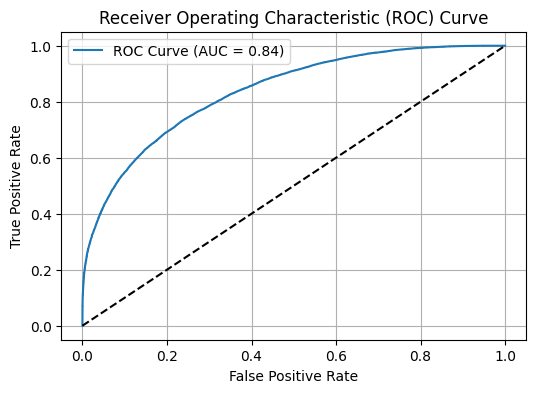

In [665]:
# Call the ROC function
# Get predicted probabilities for training set

y_train_probs = model.predict_proba(X_train_scaled)[:, 1]

fpr, tpr, thresholds = draw_roc(y_train_encoded, y_train_probs)

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [666]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
cutoff_data = []

for thresh in thresholds:
    predicted = (y_train_probs >= thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train_encoded, predicted).ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    cutoff_data.append([thresh, accuracy, sensitivity, specificity])

# Now create DataFrame
cutoff_df = pd.DataFrame(cutoff_data, columns=['threshold', 'accuracy', 'sensitivity', 'specificity'])

# Preview the cutoff_df
print(cutoff_df.head())

   threshold  accuracy  sensitivity  specificity
0        inf  0.478501     0.000000          1.0
1   0.999639  0.478521     0.000039          1.0
2   0.993221  0.482000     0.006709          1.0
3   0.993206  0.482040     0.006787          1.0
4   0.984882  0.491344     0.024627          1.0


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [667]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df = cutoff_df.sort_values(by='threshold')
cutoff_df.reset_index(drop=True, inplace=True)
cutoff_df.head()

threshold  accuracy  sensitivity  specificity
0   0.007320  0.521499     1.000000     0.000000
1   0.031028  0.534989     1.000000     0.028192
2   0.031054  0.534969     0.999961     0.028192
3   0.032698  0.536425     0.999961     0.031235
4   0.032698  0.536405     0.999922     0.031235

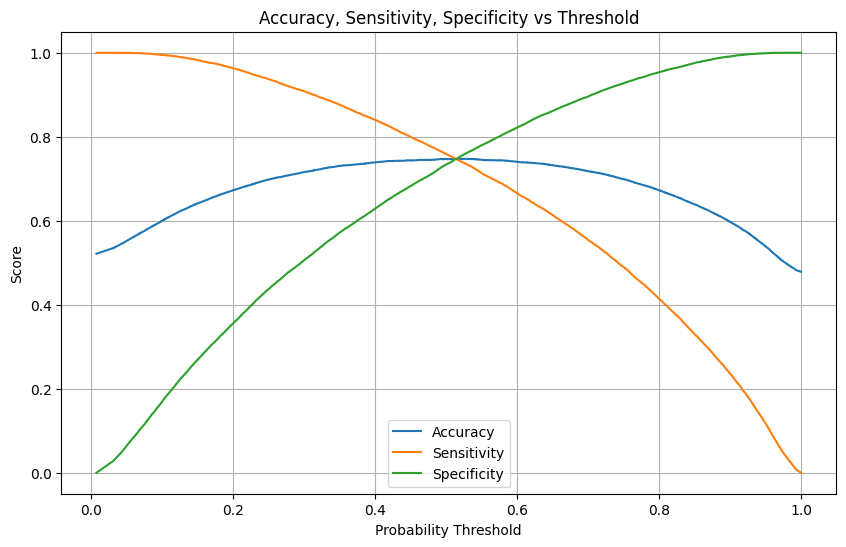

In [668]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
plt.figure(figsize=(10, 6))
plt.plot(cutoff_df['threshold'], cutoff_df['accuracy'], label='Accuracy')
plt.plot(cutoff_df['threshold'], cutoff_df['sensitivity'], label='Sensitivity')
plt.plot(cutoff_df['threshold'], cutoff_df['specificity'], label='Specificity')
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.title('Accuracy, Sensitivity, Specificity vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [669]:
# Create a column for final prediction based on the optimal cutoff
optimal_cutoff = cutoff_df.loc[(cutoff_df['sensitivity'] - cutoff_df['specificity']).abs().idxmin(), 'threshold']
print("Optimal Probability Cutoff:", optimal_cutoff)


Optimal Probability Cutoff: 0.5138105098915281


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [670]:
# Calculate the accuracy

y_val_pred_final = (y_val_probs >= optimal_cutoff).astype(int)

final_accuracy = accuracy_score(y_val_encoded, y_val_pred_final)
print("Final Accuracy:", final_accuracy)

Final Accuracy: 0.7388042093341513


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [671]:
# Create the confusion matrix once again
final_cm = confusion_matrix(y_val_encoded, y_val_pred_final)
print("Final Confusion Matrix:\n", final_cm)

Final Confusion Matrix:
 [[7558 2608]
 [2927 8098]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [672]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = final_cm.ravel()
print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")

TP: 8098, TN: 7558, FP: 2608, FN: 2927


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [673]:
sensitivity = tp / (tp + fn)
print("Sensitivity:", sensitivity)

Sensitivity: 0.7345124716553288


In [674]:
# Calculate Specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.7434585874483572


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [675]:
# Calculate Precision
precision = precision_score(y_val_encoded, y_val_pred_final)
print("Precision:", precision)

Precision: 0.7563982813375677


In [676]:
# Calculate Recall
recall = recall_score(y_val_encoded, y_val_pred_final)
print("Recall:", recall)

Recall: 0.7345124716553288


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [677]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [678]:
# Check actual and predicted values from initial model
precisions, recalls, thresholds_pr = precision_recall_curve(y_val_encoded, y_val_probs)

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

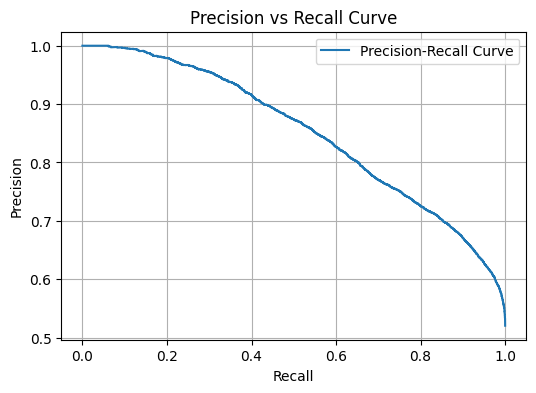

In [679]:
# Plot precision-recall curve
plt.figure(figsize=(6, 4))
plt.plot(recalls, precisions, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall Curve')
plt.grid(True)
plt.legend()
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [680]:
# Select the relevant features for validation set
X_validation = X_train
X_validation

Age  Years at Company  Monthly Income  Number of Promotions  \
41465   46                26            4617                     2   
69350   43                26            4447                     3   
28247   27                 8            9762                     0   
3217    47                29            5244                     2   
73636   25                10            4455                     0   
...    ...               ...             ...                   ...   
39742   57                26            5620                     0   
7084    34                21           10901                     0   
58283   40                25            6338                     0   
1679    47                38            5165                     0   
17472   49                13            8452                     1   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
41465                59.0                     2                        92.0   
69350                64.0                     0                       103.0   
28247                84.0                     1                        16.0   
3217                 59.0                     1                        74.0   
73636                36.0                     0                        62.0   
...                   ...                   ...                         ...   
39742                41.0                     3                        78.0   
7084                 57.0                     1                        23.0   
58283                90.0                     0                        68.0   
1679                 70.0                     0                        65.0   
17472                65.0                     1                        19.0   

       Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
41465        False             False                False  ...   
69350         True             False                False  ...   
28247         True              True                False  ...   
3217         False             False                False  ...   
73636        False             False                False  ...   
...            ...               ...                  ...  ...   
39742         True             False                False  ...   
7084          True              True                False  ...   
58283        False             False                 True  ...   
1679          True             False                False  ...   
17472         True             False                 True  ...   

       Education Level_High School  Education Level_Masterâ€™s Degree  \
41465                        False                              False   
69350                         True                              False   
28247                        False                              False   
3217                         False                              False   
73636                        False                              False   
...                            ...                                ...   
39742                        False                              False   
7084                         False                              False   
58283                        False                               True   
1679                         False                              False   
17472                        False                              False   

       Education Level_PhD  Marital Status_Married  Marital Status_Single  \
41465                False                   False                   True   
69350                False                   False                   True   
28247                False                   False                   True   
3217                  True                    True                  False   
73636                False                   False                   True   
...                    ...                     ...                    ...   
39742   

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [681]:
# Add constant to X_validation
# One-hot encode validation features like the training set
X_validation_encoded = pd.get_dummies(X_validation, drop_first=True)

# Align with training data columns to ensure matching features
X_validation_encoded = X_validation_encoded.reindex(columns=X_train.columns, fill_value=0)



8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [682]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = model.predict_proba(X_validation_encoded)[:, 1]

# View predictions
y_validation_pred[:10]

array([5.70407878e-09, 2.82795241e-09, 2.48311291e-18, 1.20631681e-08,
       5.66634303e-08, 1.24255966e-17, 2.12300985e-13, 9.04656205e-11,
       8.75548707e-18, 1.74375393e-08])

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [683]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred, columns=['predicted_probability'])

# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_train_encoded, columns=['actual'])

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
predicted_vs_actual = pd.concat([actual.reset_index(drop=True), predicted_probability.reset_index(drop=True)], axis=1)


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [684]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
optimal_cutoff = 0.05  # Replace this with your actual optimal threshold if needed
predicted_vs_actual['final_prediction'] = (predicted_vs_actual['predicted_probability'] >= optimal_cutoff).astype(int)

# Check the DataFrame
print(predicted_vs_actual.head())


   actual  predicted_probability  final_prediction
0       0           5.704079e-09                 0
1       0           2.827952e-09                 0
2       0           2.483113e-18                 0
3       0           1.206317e-08                 0
4       0           5.666343e-08                 0


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [685]:
# Calculate the overall accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predicted_vs_actual['actual'], predicted_vs_actual['final_prediction'])
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.4818


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [686]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score
conf_matrix = confusion_matrix(predicted_vs_actual['actual'], predicted_vs_actual['final_prediction'])
tn, fp, fn, tp = conf_matrix.ravel()
conf_matrix

array([[23498,   161],
       [25460,   325]])

In [687]:
# Create variables for true positive, true negative, false positive and false negative
true_positive = tp
true_negative = tn
false_positive = fp
false_negative = fn
print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")

TP: 325, TN: 23498, FP: 161, FN: 25460


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [688]:
# Calculate sensitivity
sensitivity = true_positive / (true_positive + false_negative)
sensitivity

np.float64(0.012604227263913128)

In [689]:
# Calculate specificity
specificity = true_negative / (true_negative + false_positive)
specificity


np.float64(0.9931949786550572)

### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [690]:
# Calculate precision
precision = true_positive / (true_positive + false_positive)
precision

np.float64(0.668724279835391)

In [691]:
# Calculate recall
recall = sensitivity
recall

# Print all metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positive: {true_positive}")
print(f"True Negative: {true_negative}")
print(f"False Positive: {false_positive}")
print(f"False Negative: {false_negative}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Confusion Matrix:
[[23498   161]
 [25460   325]]
True Positive: 325
True Negative: 23498
False Positive: 161
False Negative: 25460
Sensitivity (Recall): 0.0126
Specificity: 0.9932
Precision: 0.6687
Recall: 0.0126


## Conclusion
A logistic regression model was developed to predict employee retention using a range of demographic, satisfaction, performance, and tenure-related variables. Evaluation on the validation dataset with a cutoff threshold of 0.05 yielded the following results:

True Positives: 325

True Negatives: 23,498

False Positives: 161

False Negatives: 25,460

Sensitivity (Recall): 0.0126

Specificity: 0.9932

Precision: 0.6687

These results indicate that while the model performs well in correctly identifying employees who are likely to stay (high specificity), its ability to detect those who may leave is limited (low recall). Precision remains reasonably strong, suggesting that when the model does predict attrition, it is often accurate.

Recommendations for Improvement
To enhance the model’s effectiveness in identifying potential attrition cases:

Address class imbalance using techniques such as SMOTE or class weighting, to improve recall without significantly compromising precision.

Explore more complex models like Random Forest, XGBoost, or other ensemble methods that can better handle non-linear relationships and feature interactions.

Refine feature engineering, including creating interaction terms, trend-based variables (e.g., satisfaction over time), or more granular job role indicators.

Calibrate cutoff thresholds based on business priorities — for instance, favoring higher recall in retention risk scenarios.

Periodically retrain the model with updated data to capture evolving employee behavior and organizational dynamics.

Overall, the model provides a solid foundation for predicting employee retention and can be further optimized through targeted enhancements to better support data-driven retention strategies.









